# A (*Very*) Brief Introduction to Pandas
![Panda](https://pbs.twimg.com/media/ChN6FVeWwAAwP_z.jpg)
[@ThePracticalDev](https://twitter.com/thepracticaldev/status/726058213431500800)

![Sloth](https://pbs.twimg.com/media/CcuYraMXIAE5Yn6.jpg)
[@ThePracticalDev](https://twitter.com/thepracticaldev/status/705825638851149824)

# UK General Election data has been made available at data.gov.uk.
# (As an [Excel file](https://data.gov.uk/dataset/general-election-results-2017/resource/ddbeec53-59f1-4b3b-b8eb-06768e4abba4). Thanks a bunch!)
## We can make sense of it with Pandas.

In [1]:
import pandas as pd

try:
    import xlrd
    print("xlrd is installed")
except:
    print("You need the xlrd package for this notebook!")

xlrd is installed


# We could read .csv files just as easily.

In [2]:
uk_ge = pd.read_excel('https://files.datapress.com/london/dataset/general-election-results-2017/2017-06-29T11:17:24.85/2017%20General%20Election%20Results.xls')

# We get back a *Dataframe* object, we can slice it like a list.

In [3]:
uk_ge[0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
0,2017,E14000530,Aldershot,South East,C,Conservative,26955,0.550608,48955.0,C,11478.0,0.23446
1,2017,E14000530,Aldershot,South East,Lab,Labour,15477,0.316147,NaN,NaN,NaN,NaN
2,2017,E14000530,Aldershot,South East,LD,Lib Dem,3637,0.074293,NaN,NaN,NaN,NaN
3,2017,E14000530,Aldershot,South East,UKIP,UKIP,1796,0.036687,NaN,NaN,NaN,NaN
4,2017,E14000530,Aldershot,South East,Green,Green,1090,0.022265,NaN,NaN,NaN,NaN


# The "describe" method shows we have data from 2010-2017

In [4]:
uk_ge.describe()

,Year,Candidate Votes,Share of Vote,Total constituency votes,Majority,Majority %
count,11373.000000,11373.000000,11373.000000,1950.000000,1950.000000,1950.000000
mean,2013.747208,8139.515168,0.171459,47472.156923,10619.703077,0.221490
std,2.949097,9243.711226,0.188516,7241.484460,7372.311880,0.145144
min,2010.000000,12.000000,0.000205,14717.000000,2.000000,0.000048
25%,2010.000000,1016.000000,0.021899,42702.000000,4531.000000,0.097635
50%,2015.000000,3565.000000,0.076740,47952.000000,9935.000000,0.215416
75%,2017.000000,13664.000000,0.298487,52501.250000,15445.250000,0.320274
max,2017.000000,47351.000000,0.857288,74479.000000,42214.000000,0.771406


# We can select columns like a dictionary:

In [5]:
uk_ge['Constituency'][0:10]

0                   Aldershot
1                   Aldershot
2                   Aldershot
3                   Aldershot
4                   Aldershot
5         Aldridge-Brownhills
6         Aldridge-Brownhills
7         Aldridge-Brownhills
8         Aldridge-Brownhills
9    Altrincham and Sale West
Name: Constituency, dtype: object

# Sorting is easy:

In [6]:
uk_ge.sort_values('Majority', ascending=False)[0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
1249,2017,E14000775,Knowsley,North West,Lab,Labour,47351,0.853433,55483.0,Lab,42214.0,0.760846
745,2017,E14000679,East Ham,London,Lab,Labour,47124,0.832094,56633.0,Lab,39883.0,0.704236
968,2017,E14000721,Hackney South and Shoreditch,London,Lab,Labour,43974,0.794414,55354.0,Lab,37931.0,0.685244
361,2017,E14000602,Bristol West,South West,Lab,Labour,47213,0.659326,71608.0,Lab,37336.0,0.521394
422,2017,E14000615,Camberwell and Peckham,London,Lab,Labour,44665,0.777973,57412.0,Lab,37316.0,0.649969


# Sometimes, (often) data is broken.
# The "Majority %" isn't really a percentage!

In [7]:
uk_ge.sort_values('Majority %', ascending=False)[0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
1346,2017,E14000794,"Liverpool, Walton",North West,Lab,Labour,36175,0.857288,42197.0,Lab,32551.0,0.771406
1249,2017,E14000775,Knowsley,North West,Lab,Labour,47351,0.853433,55483.0,Lab,42214.0,0.760846
1342,2017,E14000793,"Liverpool, Riverside",North West,Lab,Labour,40599,0.845460,48020.0,Lab,35947.0,0.748584
1356,2017,E14000796,"Liverpool, West Derby",North West,Lab,Labour,37371,0.833096,44858.0,Lab,32908.0,0.733604
4846,2015,E14000794,"Liverpool, Walton",North West,Lab,Labour,31222,0.813009,38403.0,Lab,27777.0,0.723303


# Boolean operators give us series where conditions are true: 

In [8]:
ge_2015 = uk_ge['Year'] == 2015
ge_2015[0:5]

0    False
1    False
2    False
3    False
4    False
Name: Year, dtype: bool

# We can use series of booleans to filter data:

In [9]:
uk_ge[ge_2015][0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
3251,2015,E14000530,Aldershot,South East,C,Conservative,23369,0.505921,46191.0,C,14901.0,0.322595
3252,2015,E14000530,Aldershot,South East,Lab,Labour,8468,0.183326,NaN,NaN,NaN,NaN
3253,2015,E14000530,Aldershot,South East,UKIP,UKIP,8253,0.178671,NaN,NaN,NaN,NaN
3254,2015,E14000530,Aldershot,South East,LD,Lib Dem,4076,0.088242,NaN,NaN,NaN,NaN
3255,2015,E14000530,Aldershot,South East,Green,Green,2025,0.043840,NaN,NaN,NaN,NaN


# Filtering text data is a bit more fiddly:

In [10]:
lib_dems = uk_ge['Party'].str.match('Lib Dem')
lib_dems[0:5]

0    False
1    False
2     True
3    False
4    False
Name: Party, dtype: bool

# (Only rows with Lib Dem results.)

In [11]:
uk_ge[lib_dems][0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
2,2017,E14000530,Aldershot,South East,LD,Lib Dem,3637,0.074293,NaN,NaN,NaN,NaN
7,2017,E14000531,Aldridge-Brownhills,West Midlands,LD,Lib Dem,1343,0.033379,NaN,NaN,NaN,NaN
11,2017,E14000532,Altrincham and Sale West,North West,LD,Lib Dem,4051,0.076738,NaN,NaN,NaN,NaN
16,2017,E14000533,Amber Valley,East Midlands,LD,Lib Dem,1100,0.024012,NaN,NaN,NaN,NaN
21,2017,E14000534,Arundel and South Downs,South East,LD,Lib Dem,4783,0.079378,NaN,NaN,NaN,NaN


# Dropping the "NaN" rows gives us only winning parties:

In [12]:
ge_wins = uk_ge.dropna(axis=0)
ge_wins[0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
0,2017,E14000530,Aldershot,South East,C,Conservative,26955,0.550608,48955.0,C,11478.0,0.234460
5,2017,E14000531,Aldridge-Brownhills,West Midlands,C,Conservative,26317,0.654082,40235.0,C,14307.0,0.355586
9,2017,E14000532,Altrincham and Sale West,North West,C,Conservative,26933,0.510191,52790.0,C,6426.0,0.121728
14,2017,E14000533,Amber Valley,East Midlands,C,Conservative,25905,0.565476,45811.0,C,8300.0,0.181179
19,2017,E14000534,Arundel and South Downs,South East,C,Conservative,37573,0.623556,60256.0,C,23883.0,0.396359


# We can combine lists of booleans to filter multiple columns:

In [13]:
lib_dem_wins = ge_wins['Party'].str.match('Lib Dem')
wins_2017 = ge_wins['Year'] == 2017
ge_wins[lib_dem_wins & wins_2017][0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
89,2017,E14000547,Bath,South West,LD,Lib Dem,23436,0.472672,49582.0,LD,5694.0,0.114840
449,2017,E14000621,Carshalton and Wallington,London,LD,Lib Dem,20819,0.410202,50753.0,LD,1369.0,0.026974
776,2017,E14000684,Eastbourne,South East,LD,Lib Dem,26924,0.468896,57420.0,LD,1609.0,0.028022
1221,2017,E14000770,Kingston and Surbiton,London,LD,Lib Dem,27810,0.447264,62178.0,LD,4124.0,0.066326
1613,2017,E14000848,North Norfolk,East,LD,Lib Dem,25260,0.484019,52188.0,LD,3512.0,0.067295


# We can use "groupby" and "aggregate" a bit like SQL:

In [14]:
ge_wins[wins_2017].groupby('Party').aggregate({'Party':'count'})

,Party
Party,
Conservative,318
Democratic Unionist Party,10
Green,1
Independent,1
Labour,261
Lib Dem,12
Plaid Cymru,4
Scottish National Party,35
Sinn Fein,7


# It's easy to perform operations on entire columns.

In [15]:
(ge_wins['Majority %'] * 100)[0:5]

0     23.446022
5     35.558593
9     12.172760
14    18.117919
19    39.635887
Name: Majority %, dtype: float64

# (Let's fix the percentage column.)

In [16]:
ge_majority_percentage = (ge_wins['Majority %'] * 100).astype(int)
true_ge_wins = ge_wins.copy()
true_ge_wins['Majority %'] = ge_majority_percentage
true_ge_wins[0:5]

,Year,Code,Constituency,Region,Party Abbreviation,Party,Candidate Votes,Share of Vote,Total constituency votes,Majority Party,Majority,Majority %
0,2017,E14000530,Aldershot,South East,C,Conservative,26955,0.550608,48955.0,C,11478.0,23
5,2017,E14000531,Aldridge-Brownhills,West Midlands,C,Conservative,26317,0.654082,40235.0,C,14307.0,35
9,2017,E14000532,Altrincham and Sale West,North West,C,Conservative,26933,0.510191,52790.0,C,6426.0,12
14,2017,E14000533,Amber Valley,East Midlands,C,Conservative,25905,0.565476,45811.0,C,8300.0,18
19,2017,E14000534,Arundel and South Downs,South East,C,Conservative,37573,0.623556,60256.0,C,23883.0,39


# We can produce some plots with very little effort.

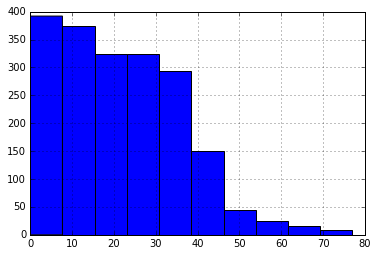

In [17]:
%matplotlib inline
true_ge_wins['Majority %'].hist()

# (How safe are Labour seats?)

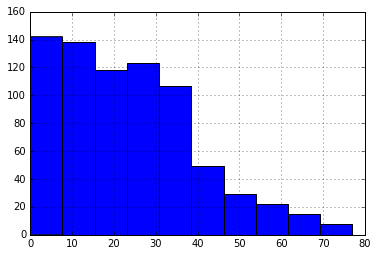

In [18]:
%matplotlib inline
lab_wins = true_ge_wins['Party'].str.match('Labour')
true_ge_wins[lab_wins]['Majority %'].hist()

# (What about the Conservatives?)

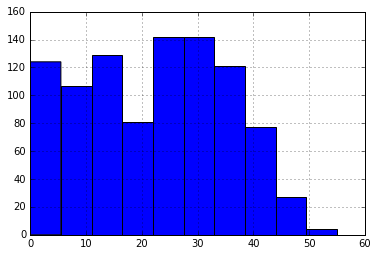

In [19]:
%matplotlib inline
con_wins = true_ge_wins['Party'].str.match('Conservative')
true_ge_wins[con_wins]['Majority %'].hist()